<a href="https://colab.research.google.com/github/Divya6859/ipl-score-prediction/blob/main/IPL_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [ ]:
df = pd.read_csv('/content/data.csv')
df

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


Checking Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
df.isnull().sum()

,0
mid,0
date,0
venue,0
batting_team,0
bowling_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
mid,617
date,442
venue,35
batting_team,14
bowling_team,14
batsman,411
bowler,329
runs,252
wickets,11
overs,140


Data Cleaning

*   Keep only relevant columns score prediction
*   Convert Types
*   Drop rows with missing values in key columns

In [ ]:
cols_keep = ['mid','date','venue','batting_team','bowling_team',
             'overs','runs','wickets','runs_last_5','wickets_last_5','total']
df = df[cols_keep].copy()

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['overs'] = pd.to_numeric(df['overs'], errors='coerce')

In [ ]:
df = df.dropna(subset=['overs','runs','wickets','runs_last_5','wickets_last_5','total'])
print("After cleaning:", df.shape)

After cleaning: (76014, 11)


Feature Engineering

In [ ]:
# Convert overs (like 10.3) → balls bowled
def overs_to_balls(x):
    s = str(x)
    if '.' in s:
        ov, b = s.split('.')
        return int(ov)*6 + int(b)
    else:
        return int(float(x))*6

df['balls'] = df['overs'].apply(overs_to_balls)
df = df.dropna(subset=['balls'])
df['balls'] = df['balls'].astype(int)

Exploratory Data Analysis

In [ ]:
sns.set_style('whitegrid')

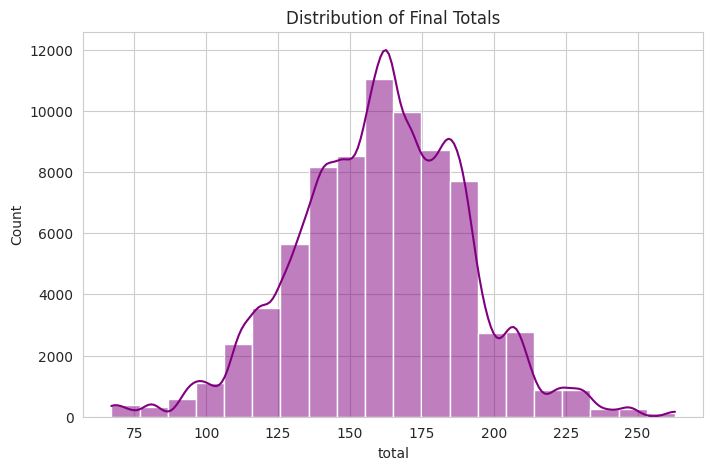

In [ ]:
sns.histplot(df['total'], bins=20, kde=True, color="purple")
plt.title("Distribution of Final Totals")
plt.show()

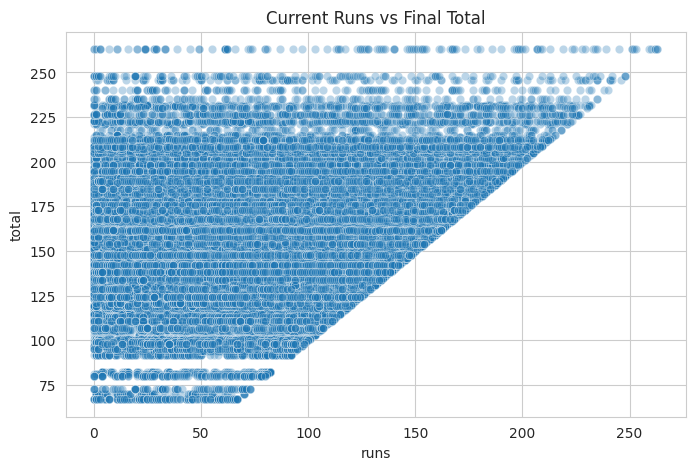

In [ ]:
sns.scatterplot(x='runs', y='total', data=df, alpha=0.3)
plt.title("Current Runs vs Final Total")
plt.show()

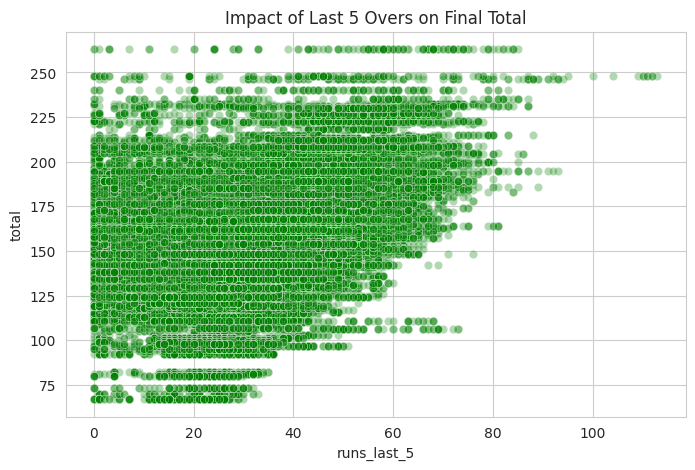

In [ ]:
sns.scatterplot(x='runs_last_5', y='total', data=df, alpha=0.3, color='green')
plt.title("Impact of Last 5 Overs on Final Total")
plt.show()

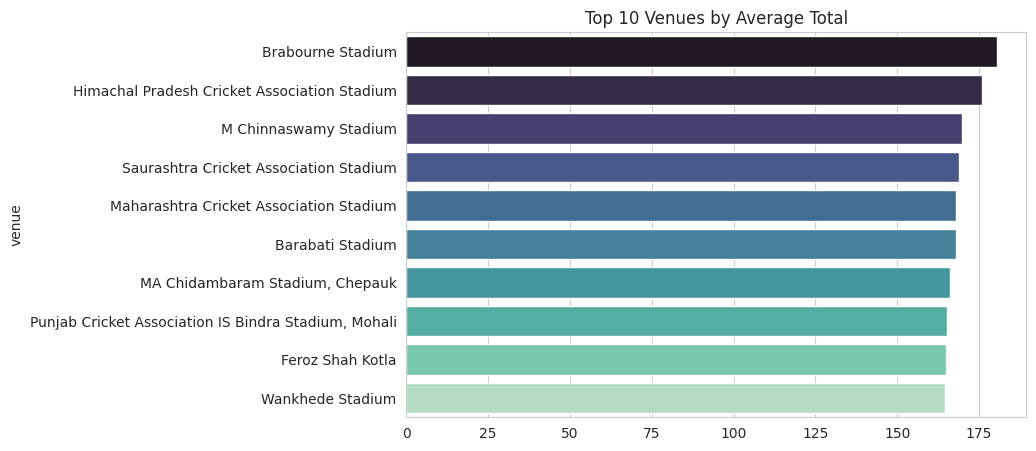

In [ ]:
venue_avg = df.groupby('venue')['total'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=venue_avg.values, y=venue_avg.index, palette="mako")
plt.title("Top 10 Venues by Average Total")
plt.show()

Prepare Features & Target

In [ ]:
features = ['batting_team','bowling_team','venue',
            'balls','runs','wickets','runs_last_5','wickets_last_5']
X = df[features].copy()
y = df['total'].copy()

One-hot encoding for categorical variables

In [ ]:
X = pd.get_dummies(X, columns=['batting_team','bowling_team','venue'], drop_first=True)
print("Feature shape:", X.shape)

Feature shape: (76014, 65)


Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (60811, 65)  Test size: (15203, 65)


Train Models (Linear Regression & Random Forest)

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lin = lin.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

Model Evaluation

In [ ]:
print("Linear Regression → R²:", r2_score(y_test, y_pred_lin),", MAE:", mean_absolute_error(y_test, y_pred_lin))

print("Random Forest → R²:", r2_score(y_test, y_pred_rf),", MAE:", mean_absolute_error(y_test, y_pred_rf))

Linear Regression → R²: 0.5559934719219246 , MAE: 14.405244293699509
Random Forest → R²: 0.6968401886994269 , MAE: 11.336622588550965


Plot Actual vs Predicted (Random Forest)

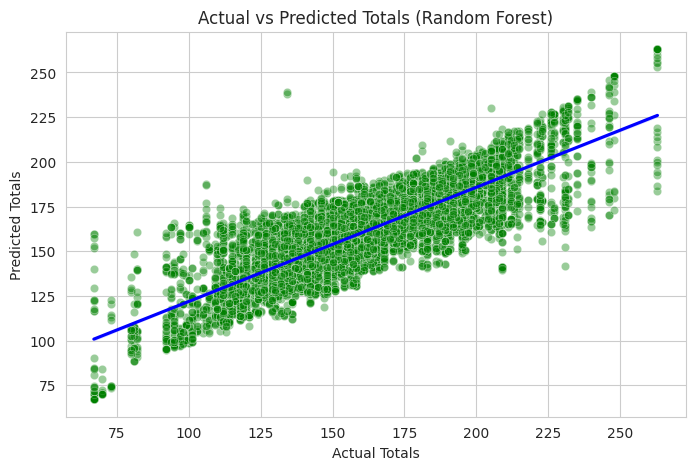

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.4, color="green")
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color="blue")
plt.xlabel("Actual Totals")
plt.ylabel("Predicted Totals")
plt.title("Actual vs Predicted Totals (Random Forest)")
plt.show()

Predictive System

Predictive System with Actual vs Predicted Scores

In [ ]:
# Check unique combinations of batting team, bowling team, and venue
unique_matches = df[['batting_team','bowling_team','venue']].drop_duplicates().reset_index()

# Select first two distinct matches
sample_rows = df.loc[[unique_matches.loc[3,'index'], unique_matches.loc[6,'index']]].copy()

# Extract actual totals
actual_totals = sample_rows['total'].values

# Prepare features for prediction
sample_features = sample_rows[features].copy()

# Encode features same as training
sample_features_encoded = pd.get_dummies(sample_features)
sample_features_encoded = sample_features_encoded.reindex(columns=X.columns, fill_value=0)

# Predict totals
predicted_totals = rf.predict(sample_features_encoded)

# Prepare results DataFrame
results = sample_rows[['batting_team', 'bowling_team', 'venue']].copy()
results['Actual Total'] = actual_totals
results['Predicted Total'] = predicted_totals.astype(int)

for idx, row in results.iterrows():
    print(f"{row['batting_team']} vs {row['bowling_team']} at {row['venue']} → Actual Total: {row['Actual Total']}, Predicted Total: {row['Predicted Total']}")


Mumbai Indians vs Royal Challengers Bangalore at Wankhede Stadium → Actual Total: 165, Predicted Total: 160
Deccan Chargers vs Delhi Daredevils at Rajiv Gandhi International Stadium, Uppal → Actual Total: 142, Predicted Total: 157
